<a href="https://colab.research.google.com/github/gianerr/CSEL302/blob/main/2B_PLATA_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Netflix_Userbase.csv')
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
print(data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [ ]:
data.fillna(method='ffill', inplace=True)

X = pd.get_dummies(data.drop(columns=['Monthly Revenue']), drop_first=True)
y = data['Monthly Revenue']

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

2.  Exploratory Data Analysis

In [ ]:
print(data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


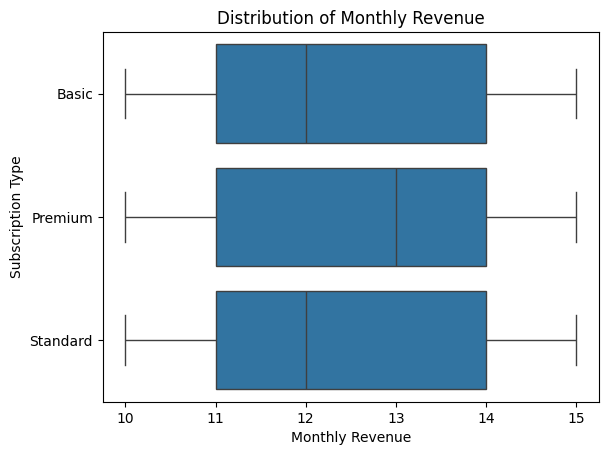

In [ ]:
sns.boxplot(data=data, x='Monthly Revenue', y='Subscription Type')
plt.title('Distribution of Monthly Revenue')
plt.show()

3. Linear Regression Model

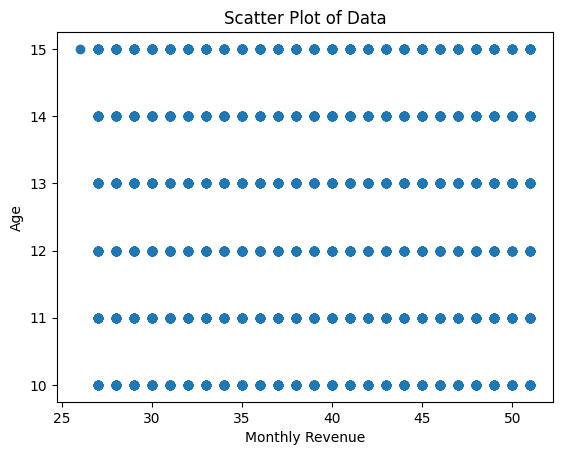

In [ ]:
plt.scatter(data['Age'], data['Monthly Revenue'])
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Scatter Plot of Data')
plt.show()

In [ ]:
x = data[['Monthly Revenue']]
y = data[['Age']]

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_

print('Slope:', slope)
print('Intercept:', intercept)

Slope: [-0.0898922]
Intercept: [39.92000763]


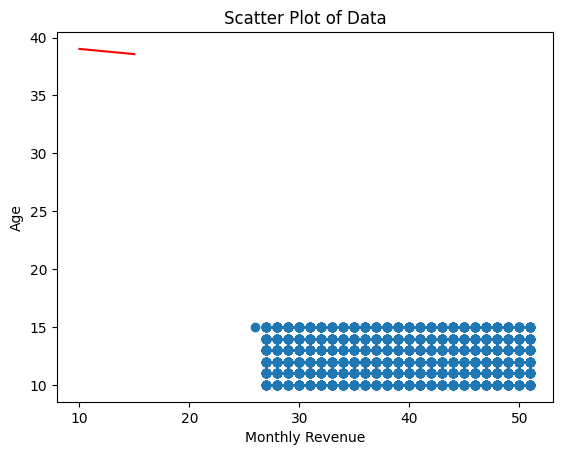

In [ ]:
plt.scatter(data['Age'], data['Monthly Revenue'])
plt.plot(x,model.predict(x), color='red')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Scatter Plot of Data')
plt.show()

4. Logistic Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Monthly Revenue'], test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
numerical_features = ['User ID', 'Age']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:\n", accuracy)
print("\nPrecision:\n", precision)
print("\nRecall:\n", recall)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy:
 0.16

Precision:
 0.155561025354488

Recall:
 0.1581433365258696

Confusion Matrix:
 [[ 8 13 20 15 13 16]
 [12  9 24 12 11 11]
 [10 12 23 15 19 14]
 [16  9 24 12 14 13]
 [ 7 15 19 17 17 10]
 [11  7 18 10 13 11]]


5. Comparative Analysis and Visualization

In [ ]:
print("""
Both regression models are needed to better present and visualize monthly
revenue and customer feedback. Using the Netflix Userbase dataset, I have
seen a positive feedback on the customers by using Monthly Revenue as the
dependent variable and their Age as independent variable.
""")


Both regression models are needed to better present and visualize monthly 
revenue and customer feedback. Using the Netflix Userbase dataset, I have
seen a positive feedback on the customers by using Monthly Revenue as the 
dependent variable and their Age as independent variable. 

